# Графики

<!--Этот файл помогает hypertrain11.ipynb правильно нарисовать графики. Без
его помощи hypertrain11.ipynb не справился бы.-->

In [48]:
import json

with open('./report.json') as report:
    report = json.load(report)

In [50]:
import pandas as pd
pd.DataFrame(report['evaluate_RegularNetwork_2_p0_N2'])

,noise_factor,accuracy,f1,roc_auc
0,0.00,0.916185,0.919610,0.989121
1,0.04,0.913295,0.916961,0.988632
2,0.08,0.901734,0.905165,0.986697
3,0.12,0.916185,0.919051,0.986363
4,0.16,0.893064,0.897363,0.983613
5,0.20,0.901734,0.905548,0.982616
6,0.24,0.913295,0.916372,0.982005
7,0.28,0.887283,0.889962,0.967709
8,0.32,0.846821,0.851066,0.969926
9,0.36,0.864162,0.865896,0.961206


In [51]:
pd.DataFrame(report['loss_AugmentedReLUNetwork_2_p0.05_N7'])

,0
0,1.515457
1,1.316339
2,1.342000
3,1.045563
4,0.997774
...,...
1155,0.187133
1156,0.145356
1157,0.284774
1158,0.116929


In [52]:
df = pd.DataFrame([[key] + key.split('_') for key in report.keys()])
df.columns = ['Key', 'Measurement', 'Network', 'Dataset', 'P', 'N']
df.Dataset = df.Dataset.apply(lambda x: int(x))
df.P = df.P.apply(lambda x: float(x[1:]))
df.N = df.N.apply(lambda x: int(x[1:]))
df

,Key,Measurement,Network,Dataset,P,N
0,loss_RegularNetwork_1_p0_N0,loss,RegularNetwork,1,0.00,0
1,loss_AugmentedReLUNetwork_1_p0_N0,loss,AugmentedReLUNetwork,1,0.00,0
2,loss_RegularNetwork_2_p0_N0,loss,RegularNetwork,2,0.00,0
3,loss_AugmentedReLUNetwork_2_p0_N0,loss,AugmentedReLUNetwork,2,0.00,0
4,loss_RegularNetwork_3_p0_N0,loss,RegularNetwork,3,0.00,0
...,...,...,...,...,...,...
835,evaluate_RegularNetwork_2_p0.99_N9,evaluate,RegularNetwork,2,0.99,9
836,evaluate_RegularNetwork_3_p0.99_N9,evaluate,RegularNetwork,3,0.99,9
837,evaluate_AugmentedReLUNetwork_1_p0.99_N9,evaluate,AugmentedReLUNetwork,1,0.99,9
838,evaluate_AugmentedReLUNetwork_2_p0.99_N9,evaluate,AugmentedReLUNetwork,2,0.99,9


In [75]:
from dataclasses import dataclass

@dataclass
class PlotParams:
    measurement: str
    dataset: int
    network: str
    metric: str
    p: int

In [77]:
def compute_curve(plot_params: PlotParams) -> pd.DataFrame:
    rows = (
        df
            .loc[df.Measurement == plot_params.measurement]
            .loc[df.Dataset == plot_params.dataset]
            .loc[df.Network == plot_params.network]
            .loc[df.P == plot_params.p]
    )

    if plot_params.measurement == 'loss':
        values = pd.DataFrame([report[row.Key] for row in rows.itertuples()])
    else:
        values = pd.DataFrame([report[row.Key][plot_params.metric] for row in rows.itertuples()])

    result = values.quantile([0.25, 0.75]).transpose()
    result['mean'] = values.mean()
    return result

pd.concat([compute_curve(
    PlotParams(
        measurement='evaluate',
        dataset=1,
        network='RegularNetwork',
        metric='accuracy',
        p=0,
    )
), compute_curve(
    PlotParams(
        measurement='evaluate',
        dataset=3,
        network='AugmentedReLUNetwork',
        metric='mse',
        p=0.05,
    )
)], axis=1)



,0.25,0.75,mean,0.25,0.75,mean
0,0.723684,0.927632,0.793860,15.757455,17.135297,16.579018
1,0.717105,0.927632,0.792982,15.771157,17.170691,16.600411
2,0.725877,0.927632,0.794737,15.775719,17.222878,16.629390
3,0.721491,0.927632,0.792982,15.876834,17.373856,16.710673
4,0.714912,0.927632,0.792105,15.963411,17.372471,16.787836
5,0.723684,0.927632,0.794737,16.082497,17.490043,16.920696
6,0.723684,0.927632,0.794737,16.284897,17.664027,17.067869
7,0.723684,0.927632,0.793860,16.282884,17.804276,17.123885
8,0.719298,0.927632,0.793860,16.678998,18.424373,17.419963
9,0.710526,0.927632,0.792105,16.979859,18.475041,17.584005


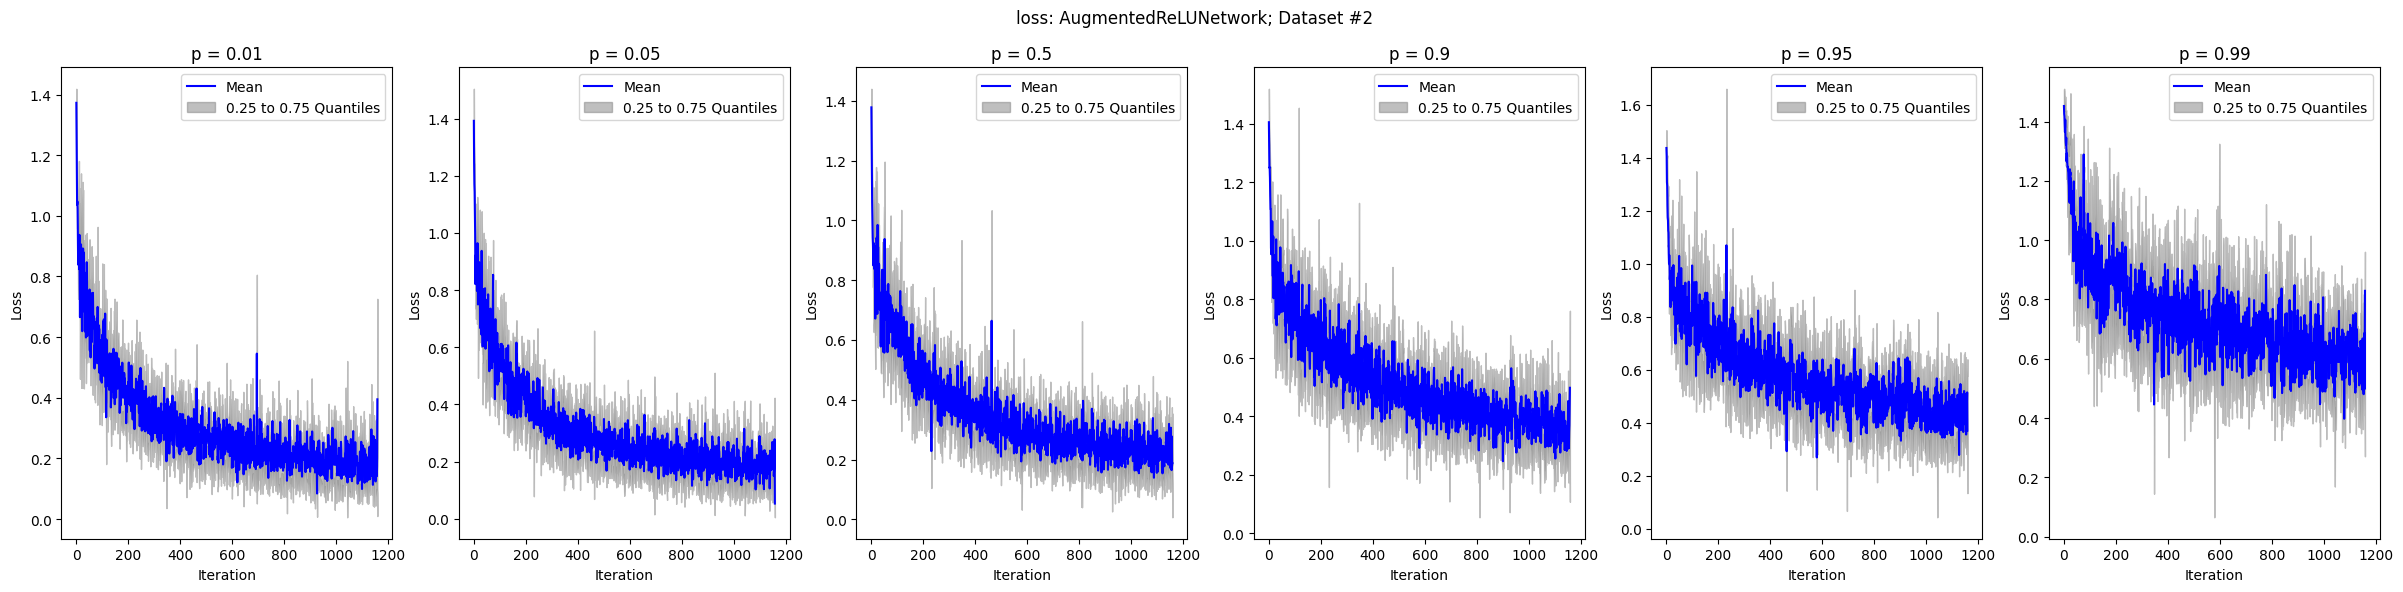

In [ ]:
import matplotlib.pyplot as plt

def plot_curve(
    ax,
    curve: pd.DataFrame,
    title: str,
    xlabel: str,
    ylabel: str,
):
    ax.plot(curve.index, curve['mean'], label='Mean', color='blue')
    ax.fill_between(curve.index, curve[0.25], curve[0.75], color='gray', alpha=0.5, label='0.25 to 0.75 Quantiles')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

fig, axs = plt.subplots(1, 6, figsize=(24, 6))
for (i, p) in enumerate([0.01, 0.05, 0.5, 0.9, 0.95, 0.99]):
    plot_params=PlotParams(
        measurement='loss',
        dataset=2,
        network='AugmentedReLUNetwork',
        metric='loss',
        p=p,
    )

    plot_curve(
        ax=axs[i],
        curve=compute_curve(plot_params=plot_params),
        title=f'p = {plot_params.p}',
        xlabel='Iteration',
        ylabel='Loss',
    )
fig.suptitle(f'{plot_params.measurement}: {plot_params.network}; Dataset #{plot_params.dataset}')
plt.tight_layout()
plt.show()